# 吴恩达深度学习课程作业L1W2HW1=numpy入门

## 参考

1. [视频链接](https://mooc.study.163.com/university/deeplearning_ai#/c)
2. [作业链接](https://www.heywhale.com/mw/project/5dd236a800b0b900365eca9b)

## Numpy基础

### 1-使用numpy构建基本函数

#### 1-1 sigmoid函数和np.exp()

* sigmoid函数公式

$$
\sigma(x) = \frac{1}{1+exp(-x)}
$$

* 为什么np.exp()比math.exp()更可取？
    1. 深度学习中主要使用的是矩阵和向量，因此numpy更为实用
    2. math.exp()只适用于输入是实数

In [1]:
import math

def func_basic_sigmoid(x):
    """
    使用math.exp构建sigmoid函数
    :param x: a scaler
    :return sigmoid(x)
    """
    return 1 / (1 + math.exp(-x))

In [2]:
func_basic_sigmoid(3)

0.9525741268224334

In [3]:
# func_basic_sigmoid([1,2,3])

In [4]:
import numpy as np

x = np.array([1,2,3])
np.exp(x)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [5]:
import numpy as np

def func_numpy_sigmoid(x):
    """
    使用np.exp构建sigmoid函数
    :param x: a scaler or numpy array of any size
    :return sigmoid(x)
    """
    return 1 / (1 + np.exp(-x))

In [6]:
x = np.array([1,2,3])
func_numpy_sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

#### 1-2 simoid函数的梯度

* 梯度求解公式

$$
\sigma^{'}(x) = \sigma(x)(1-\sigma(x))
$$

In [7]:
def func_numpy_sigmoid_derivative(x):
    """
    计算sigmoid函数在x处的梯度
    :param x: a scaler or numpy array of any size
    :return 梯度
    """
    s = func_numpy_sigmoid(x)
    return s * (1 - s)

In [8]:
x = np.array([0,1,2,3,100])
func_numpy_sigmoid_derivative(x)

array([0.25      , 0.19661193, 0.10499359, 0.04517666, 0.        ])

#### 1-3重塑数组

* np.shape: 获取矩阵或者向量的维度
* np.reshape(): 将矩阵或者向量重塑成其他shape
* 例如实现image2vector()，将输入(length, height, depth)的3D数组输入，转换成(length*height*depth, 1)的1D数组

In [9]:
def func_image2vector(image):
    """
    图像输入转换成vector
    :param image: a numpy array of shape (length, height, depth)
    :return v: a vector of shape (length*height*depth, 1)
    """
    return image.reshape(image.shape[0] * image.shape[1] * image.shape[2], 1)

In [10]:
image = np.array([[[ 0.67826139,  0.29380381],
                    [ 0.90714982,  0.52835647],
                    [ 0.4215251 ,  0.45017551]],

                   [[ 0.92814219,  0.96677647],
                    [ 0.85304703,  0.52351845],
                    [ 0.19981397,  0.27417313]],

                   [[ 0.60659855,  0.00533165],
                    [ 0.10820313,  0.49978937],
                    [ 0.34144279,  0.94630077]]])
image.shape

(3, 3, 2)

In [11]:
v = func_image2vector(image)
v.shape

(18, 1)

In [12]:
v

array([[0.67826139],
       [0.29380381],
       [0.90714982],
       [0.52835647],
       [0.4215251 ],
       [0.45017551],
       [0.92814219],
       [0.96677647],
       [0.85304703],
       [0.52351845],
       [0.19981397],
       [0.27417313],
       [0.60659855],
       [0.00533165],
       [0.10820313],
       [0.49978937],
       [0.34144279],
       [0.94630077]])

#### 1-4 行标准化

* 为什么标准化？
    1. 数据归一化后，梯度下降的收敛速度更快，通常会表现出更好的效果
* 练习：构建normalize_rows()函数来标准化矩阵的行

In [13]:
def func_normalize_rows(x):
    """
    行标准化
    :param: x: a numpy matrix of shape (n, m)
    :return x: 行标准化后的矩阵
    """
    x_norm = np.linalg.norm(x, axis=1, ord=2, keepdims=True)  # Matrix or vector norm
    print(x_norm, x_norm.shape)
    
    return x / x_norm

In [14]:
x = np.array([[0,3,4], 
              [1,6,4]])
x

array([[0, 3, 4],
       [1, 6, 4]])

In [15]:
func_normalize_rows(x)

[[5.        ]
 [7.28010989]] (2, 1)


array([[0.        , 0.6       , 0.8       ],
       [0.13736056, 0.82416338, 0.54944226]])

#### 1-5 broadcast and softmax

* broadcast: 广播，数组+标量，会将标量自动broadcast成和数组一样维度再相加
* softmax:

$$
softmax(x) = \frac{exp(x_i)}{\sum{exp(x_j)}}
$$

* 练习：实现softmax函数

In [16]:
def func_softmax_rows(x):
    """
    softmax函数， 按行
    :param x: a matrix of shape (n, m)
    :return x: softmax过后的矩阵
    """
    x_exp = np.exp(x)
    x_row_sum = np.sum(x_exp, axis=1, keepdims=True)
    return x_exp/ x_row_sum

In [17]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
x

array([[9, 2, 5, 0, 0],
       [7, 5, 0, 0, 0]])

In [18]:
func_softmax_rows(x)

array([[9.80897665e-01, 8.94462891e-04, 1.79657674e-02, 1.21052389e-04,
        1.21052389e-04],
       [8.78679856e-01, 1.18916387e-01, 8.01252314e-04, 8.01252314e-04,
        8.01252314e-04]])

### 2-向量化

* 为了确保代码的高效计算，我们将使用向量化
* 例如：尝试区分点，外部，元素乘积之间的区别

In [19]:
import time

x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

* 经典点乘-dot product

In [20]:
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot += x1[i]*x2[i]
toc = time.process_time()
print(dot, (toc-tic)*1000)

278 0.1067500000004884


In [21]:
tic = time.process_time()
dot = np.dot(x1, x2)
print(dot, (toc-tic)*1000)

278 -4.070242000000057


* 经典外乘-outer product

In [22]:
tic = time.process_time()
outer = np.zeros((len(x1), len(x2)))
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i, j] = x1[i] * x2[j]
toc = time.process_time()
print(outer, (toc-tic)*1000)

[[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] 0.21479900000009877


In [23]:
tic = time.process_time()
outer = np.outer(x1, x2)
print(outer, (toc-tic)*1000)

[[81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [63 14 14 63  0 63 14 35  0  0 63 14 35  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]] -5.324081000000369


* 元素相乘-elementwise product

In [24]:
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i] * x2[i]
toc = time.process_time()
print(mul, (toc-tic)*1000)

[81.  4. 10.  0.  0. 63. 10.  0.  0.  0. 81.  4. 25.  0.  0.] 0.122009000000034


In [25]:
tic = time.process_time()
mul = np.multiply(x1, x2)
print(mul, (toc-tic)*1000)

[81  4 10  0  0 63 10  0  0  0 81  4 25  0  0] -3.995859999999851


* 矩阵相乘-general dot product

In [26]:
np.random.seed(2030)
W = np.random.rand(3, len(x1))
tic = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i, j]*x1[j]
toc = time.process_time()
print(gdot, (toc-tic)*1000)

[23.51513471 26.17443232 12.03612207] 0.15905900000046103


In [27]:
tic = time.process_time()
gdot = np.dot(W, x1)
print(gdot, (toc-tic)*1000)

[23.51513471 26.17443232 12.03612207] -4.445438000000301


#### 2-1 实现l1和l2损失函数

* 向量化版本

In [28]:
def func_l1_l2(y_hat, y):
    """
    l1损失函数
    :param y_hat: 预测值
    :param y: 实际值
    return l1_loss, l2_loss:
    """
    return np.sum(np.abs(y-y_hat)), np.dot((y-y_hat), (y-y_hat).T)

In [29]:
y_hat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])

func_l1_l2(y_hat, y)

(1.1, 0.43)

# 吴恩达深度学习课程作业L1W2HW2=神经网络实现逻辑回归

## 参考

1. [视频链接](https://mooc.study.163.com/university/deeplearning_ai#/c)
2. [作业链接](https://www.heywhale.com/mw/project/5dd23dbf00b0b900365ecef1)

## 神经网络实现逻辑回归

* 建立学习算法的一般步骤
    1. 初始化参数
    2. 计算损失函数及梯度
    3. 使用优化算法（梯度下降）

### 1-导入模块

In [30]:
import numpy as np  # python科学计算的基本包
import matplotlib.pyplot as plt  # python图形库
import h5py  # 处理存储为h5文件格式的数据集
import scipy  # python算法库和数学工具包
from PIL import Image  # 图像处理库
from scipy import ndimage  # 图像处理
# from lr_utils import load_dataset

%matplotlib inline

In [31]:
root_path = './深度学习之吴恩达课程作业1/'

In [32]:
def func_load_dataset():
    """
    from lr_utils import load_dataset
    :return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
    """
    train_dataset = h5py.File(root_path + 'train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    test_dataset = h5py.File(root_path + 'test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

### 2-问题描述

* 问题说明：
    1. label为cat(y=1)或非cat(y=0)的图像集
    2. 图像维度为(length, height, 3)
    3. 构建一个简单的图像识别算法，对图片进行分类

* 数据EDA
    1. 深度学习中许多报错都来自于矩阵/向量尺寸不匹配，如果可以保持他们不变，则可以消除很多错误
    2. 机器学习常见的数据预处理是对数据集进行居中和标准化，即减去均值除以标准差。但是图片数据集只需要将每一行除以255，效果差不多

In [33]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = func_load_dataset()

In [34]:
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
print(train_set_y_orig.shape)
print(test_set_y_orig.shape)

(209, 64, 64, 3)
(50, 64, 64, 3)
(1, 209)
(1, 50)


y=[0] it is a non-cat


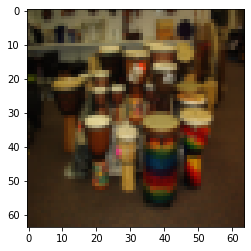

In [35]:
index = 5
plt.imshow(train_set_x_orig[index])
print('y=' + str(train_set_y_orig[:, index]) + ' it is a ' + classes[np.squeeze(train_set_y_orig[:, index])].decode('utf-8'))

* 重塑数据集，将大小(n, length, height, 3)的重塑为(length\*height\*3, n)

In [36]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [37]:
train_set_x_flatten[:5, 0]

array([17, 31, 56, 22, 33], dtype=uint8)

* 数据预处理

In [38]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [39]:
train_set_x[:5, 0]

array([0.06666667, 0.12156863, 0.21960784, 0.08627451, 0.12941176])

### 3-学习算法的一般架构

* 逻辑回归实际是一个简单的神经网络，如下图

![./L1W2/LogReg.png](./深度学习之吴恩达课程作业1/LogReg_network.png)

* 算法的数学表达式

$$
z^{(i)} = w^Tx^{(i)}+b \\
\hat{y}^{(i)} = a^{(i)} = \sigma(z^{(i)})  \\
\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})
$$

* 关键步骤
    1. 初始化模型参数
    2. 最小化损失函数来学习参数
    3. 使用学习到的参数进行预测（在测试集上）
    4. 分析结果并得出结论

### 4-构建算法的各个部分

* 构建神经网络主要步骤：
    1. 定义模型架构
    2. 初始化模型参数
    3. 循环：
        1. 计算当前损失（正向传播）
        2. 计算当前梯度（反向传播）
        3. 更新参数（梯度下降）
        

#### 4-1 辅助函数=sigmoid

In [40]:
def func_numpy_sigmoid(x):
    """
    sigmoid函数
    :param x: a scalar or numpy array of any size
    :return s: sigmoid(x)
    """
    return 1 / (1 + np.exp(-x))

In [41]:
func_numpy_sigmoid(np.array([0, 2]))

array([0.5       , 0.88079708])

#### 4-2 初始化参数

* 将w初始化为0的向量

In [42]:
def func_initial_parameters(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    :param dim: w参数的维度
    :return w, b
    """
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape==(dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [43]:
w, b = func_initial_parameters(2)
print(w, b)

[[0.]
 [0.]] 0


#### 4-3 前向，后向传播

* 前向传播：

$$
A = \sigma(W^TX+b)=(a^{(0)},...,a^{(m)})  \\
J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})
$$

* 后向传播

$$
\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T  \\
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})
$$

In [44]:
def func_propagate(w, b, X, Y):
    """
    前向后向传播
    :param w: weights of size(length*height*3, 1)
    :param b: bias
    :param X: data of size(length*height*3, num_samples)
    :param Y: target of size(1, num_samples)
    """
    m = X.shape[1]
    
    # forward
    A = func_numpy_sigmoid(np.dot(w.T, X) + b)
#     print('A: \n', A, '\n', A.shape)
#     J = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    J = -1 / m * np.sum(np.multiply(Y, np.log(A)) + np.multiply((1 - Y), np.log(1 - A)))
#     print('J: \n', J, '\n', J.shape)
    
    # backward
    dw = 1 / m * np.dot(X, (A-Y).T)
    db = 1 / m * np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    J = np.squeeze(J)
    assert(J.shape == ())
    
    grads = {
        'dw': dw,
        'db': db
    }
    return grads, J

In [45]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
print(w.shape, b, X.shape, Y.shape)

(2, 1) 2 (2, 2) (1, 2)


In [46]:
grads, cost = func_propagate(w, b, X, Y)

In [47]:
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


#### 4-4 优化函数

* 最小化J来学习w,b
* 参数的更新规则：

$$
\theta = \theta - \alpha * d\theta
$$

In [48]:
def func_optimizer(w, b, X, Y, epochs, lr, print_cost=False):
    """
    优化函数，求解w,b
    :param w: (length*height*3, 1)
    :param b:
    :param X: (length*height*3, num_samples)
    :param Y: (1, num_samples)
    :param epochs: num_iterations
    :param lr: learning_rate
    :param print_cost: True to print the loss every 100 steps
    :return params, grads, costs
    """
    costs = []
    for i in range(epochs):
        grads, cost = func_propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - lr * dw
        b = b - lr * db
        
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print('cost after epoch %i: %f' % (i, cost))
    params = {
        'w': w,
        'b': b
    }
    grads = {
        'dw': dw,
        'db': db
    }
    return params, grads, costs

In [49]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
print(w.shape, b, X.shape, Y.shape)

(2, 1) 2 (2, 2) (1, 2)


In [50]:
params, grads, costs = func_optimizer(w, b, X, Y, epochs=100, lr=0.009, print_cost=False)

print('w=', params['w'])
print('b=', params['b'])
print('dw=', grads['dw'])
print('db=', grads['db'])
print(costs)

w= [[0.1124579 ]
 [0.23106775]]
b= 1.5593049248448891
dw= [[0.90158428]
 [1.76250842]]
db= 0.4304620716786828
[6.000064773192205]


* predict
* 预测公式

$$
\hat{Y} = A = \sigma(w^TX + b)
$$

In [51]:
def func_predict(w, b, X):
    """
    predict
    :param w: (length*height*3, 1)
    :param b:
    :param X: (length*height*3, num_samples)
    :return y_pred
    """
    m = X.shape[1]
#     y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = func_numpy_sigmoid(np.dot(w.T, X) + b)  # predict
    
    y_pred = [0 if A[0, i] <= 0.5 else 1 for i in range(A.shape[1])]
    y_pred = np.expand_dims(y_pred, 0)
    
    
    assert(y_pred.shape==(1, m))
    return y_pred

In [52]:
y_pred = func_predict(w, b, X)
print('y_pred=', y_pred)

y_pred= [[1 1]]


#### 5-将所有功能合并到模型中

In [53]:
def func_model(x_train, y_train, x_test, y_test, epochs=2000, lr=0.5, print_cost=False):
    """
    构建logistic regression
    :param x_train:
    :param y_train:
    :param x_test:
    :param y_test:
    :param epochs:
    :param lr:
    :param print_cost:
    :return d: dictionary containing information about the model.
    """
    w, b = func_initial_parameters(x_train.shape[0])
    
    params, grads, costs = func_optimizer(w, b, x_train, y_train, epochs, lr, print_cost=print_cost)
    
    w = params['w']
    b = params['b']
    
    y_pred_train = func_predict(w, b, x_train)
    y_pred_test = func_predict(w, b, x_test)
    
    print('train acc: {} %'.format(100-np.mean(np.abs(y_pred_train - y_train))*100))
    print('test acc: {} %'.format(100-np.mean(np.abs(y_pred_test - y_test))*100))
    
    d = {
        'costs': costs,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test,
        'w': w,
        'b': b,
        'lr': lr,
        'epochs': epochs
    }
    return d

In [54]:
d = func_model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, epochs=2000, lr=0.005, print_cost=True)

cost after epoch 0: 0.693147
cost after epoch 100: 0.584508
cost after epoch 200: 0.466949
cost after epoch 300: 0.376007
cost after epoch 400: 0.331463
cost after epoch 500: 0.303273
cost after epoch 600: 0.279880
cost after epoch 700: 0.260042
cost after epoch 800: 0.242941
cost after epoch 900: 0.228004
cost after epoch 1000: 0.214820
cost after epoch 1100: 0.203078
cost after epoch 1200: 0.192544
cost after epoch 1300: 0.183033
cost after epoch 1400: 0.174399
cost after epoch 1500: 0.166521
cost after epoch 1600: 0.159305
cost after epoch 1700: 0.152667
cost after epoch 1800: 0.146542
cost after epoch 1900: 0.140872
train acc: 99.04306220095694 %
test acc: 70.0 %


* 结果分析：
    1. 训练acc接近100%，测试acc为70%
    2. 该模型明显适合训练数据，有些过拟合
* 使用下面代码可以查看预测结果

y= 1 pred= 1


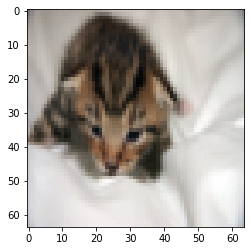

In [55]:
index = 1
plt.imshow(test_set_x[:, index].reshape(test_set_x_orig.shape[1], test_set_x_orig.shape[1], 3))
print('y=', test_set_y_orig[0, index], 'pred=', d['y_pred_test'][0, index])

* 绘制损失函数和梯度

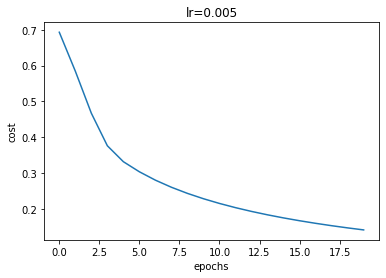

In [56]:
costs = np.array(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('epochs')
plt.title('lr='+str(d['lr']))
plt.show()

#### 6-学习率的选择

* lr决定我们更新参数的速度
* 如果太大，可能会超出最佳值
* 如果太小，可能需要更多的迭代才能收敛到最佳值

lr= 0.01
train acc: 99.52153110047847 %
test acc: 68.0 %
----------------------------------------------------
lr= 0.001
train acc: 88.99521531100478 %
test acc: 64.0 %
----------------------------------------------------
lr= 0.0001
train acc: 68.42105263157895 %
test acc: 36.0 %
----------------------------------------------------


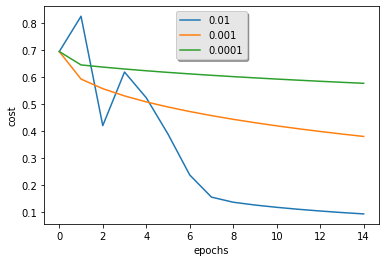

In [57]:
lr_list = [0.01, 0.001, 0.0001]
models = {}
for lr in lr_list:
    print('lr=', lr)
    models[str(lr)] = func_model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, 
                                 epochs=1500, lr=lr, print_cost=False)
    print('-'*52)

for lr in lr_list:
    plt.plot(np.array(models[str(lr)]['costs']), label=str(models[str(lr)]['lr']))

plt.ylabel('cost')
plt.xlabel('epochs')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

* 分析
    1. 不同的学习率带来不同损失
    2. 学习率太大，损失上下波动，甚至可能会发散
    3. 较低损失并不意味着模型效果好，当训练精度比测试精度高很多时，会发生过拟合情况
* 深度学习中，通常建议
    1. 选择好学习率
    2. 如果过拟合，则使用其他方法减少过拟合

#### 7-预测自己的图像

In [58]:
image_path = root_path + 'cat_in_iran.jpg'
image = np.array(plt.imread(image_path))
image.shape

(1115, 1114, 3)

In [59]:
num_px = train_set_x_orig.shape[1]
my_image = np.array(Image.fromarray(image).resize((num_px, num_px))).reshape((1, num_px*num_px*3)).T
my_image.shape

(12288, 1)

In [60]:
my_pred_image = func_predict(d['w'], d['b'], my_image)
my_pred_image

array([[1]])

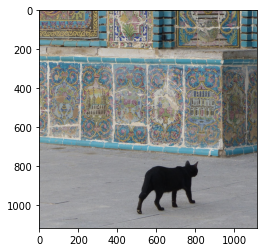

In [61]:
plt.imshow(image)

In [62]:
print('y_pred=', np.squeeze(my_pred_image), ", your algorithm predicts a \"" + classes[int(np.squeeze(my_pred_image)),].decode("utf-8") +  "\" picture.")

y_pred= 1 , your algorithm predicts a "cat" picture.
